In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("---- IRIS Dataset ----")

iris = pd.read_csv("/content/iris (1) (1).csv")
X = iris.drop("species", axis=1)
y = iris["species"]

# Encoding target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Linear SVM
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train RBF SVM
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

# Results for Linear
print("\nLinear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# Results for RBF
print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

---- IRIS Dataset ----

Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



---- Letter Recognition Dataset ----
Accuracy: 0.95025
Confusion Matrix:
[[148   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1 147   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 126   0   2   0   2   1   0   0   2   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 153   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 135   0   3   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   1   0   0   1 134   0   0   1   0   0   0   0   0   0   1   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   1   3   0   0 153   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   3   0   4   0   0   1 118   0   0   4   0   0   1   2   0   0   8
    0   0   1   0   0   1   1   0]
 [  0   0   0   0   0   2   0   0 136   7   0   0   0 

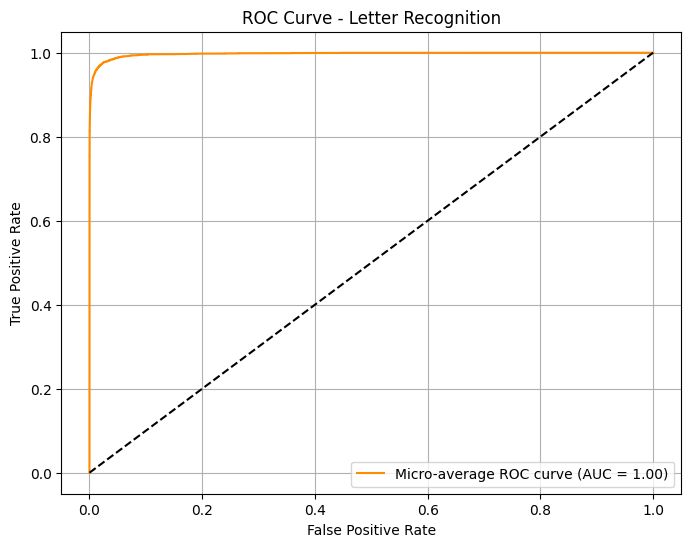

In [5]:
print("\n---- Letter Recognition Dataset ----")

letters = pd.read_csv("/content/letter-recognition.csv")  # Assuming this is the letter dataset
X = letters.iloc[:, 1:]  # features
y = letters.iloc[:, 0]   # target (letter)

# Encode labels
y_encoded = LabelEncoder().fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve and AUC (multiclass handled using One-vs-Rest)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

# Train again using OneVsRest for ROC
classifier = OneVsRestClassifier(SVC(kernel="rbf", probability=True))
classifier.fit(X_train, label_binarize(y_train, classes=np.unique(y_encoded)))
y_score = classifier.predict_proba(X_test)

# Plot ROC for each class and micro-average ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Letter Recognition")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()